IFTS 24

# Ejercicios de Procesamiento Digital de Imágenes.

## TP 01 Manipulación Básica

Profesor: **Matías Barreto**

Alumna: **Gabriela Pari Vaca**


---



**Ejercicio 1: Espacios de Color**

Usando una imagen a color de su elección:

a) Cargar la imagen con OpenCV y mostrar los canales BGR por separado.

b) Identificar cuál de los tres canales tiene mayor información basándose en los valores promedio.

c) Convertir la imagen de BGR a RGB y explicar por qué los colores se ven diferentes antes y después de la conversión.




---


## Instalación e importación de librerías

Estoy trabajando en Deepnote, es un entorno de Jupyter notebook, por lo tanto agregue algunos comandos necesarios para que se pueda ejecutar este cuaderno.


In [ ]:
!apt-get update && apt-get install -y libgl1-mesa-glx -q
!apt-get install -y libglib2.0-0 -q
!pip install opencv-python
# !pip install scikit-image

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,253 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,561 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/main amd

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

OpenCV es una librería especializada en procesamiento de imágenes y visión por computador

**Matplotlib** es una librería de visualización que permite graficar datos y mostrar imágenes.

**NumPy** es una librería para operaciones matemáticas y manipulación de arreglos. En el contexto de imágenes, es muy útil porque OpenCV trata imágenes como arreglos NumPy.

## Funciones auxiliares

Arme algunas funciones donde se repetía código. Esto me permite reutilizar y reducir de lineas de código.


In [ ]:
def info_imagen(imagen):
    print("Mínimo:", imagen.min())
    print("Máximo:", imagen.max())
    print("Dimensiones de la imagen:", imagen.shape)
    print("Tipo de datos:", imagen.dtype)
    print("Tamaño en memoria BGR(bytes):", imagen.nbytes)


def mostrar_imagen(imagen, titulo, gama='gray',figsize=None):
    plt.figure(figsize=figsize)
    plt.title(titulo)
    plt.imshow(imagen, cmap=gama)
    plt.show()

canales_RGB = {'Rojo': 0, 'Verde': 1, 'Azul': 2}
canales_BGR = {'Azul': 0, 'Verde': 1, 'Rojo': 2}

def obtener_canal(imagen, canal, es_RGB=True):
    if es_RGB:
        return imagen[:, :, canales_RGB[canal]]
    else:
        return imagen[:, :, canales_BGR[canal]]

def mostrar_estadisticas_canal_imagen(imagen, canal):
    print(f"Estadísticas del canal {canal}:")
    print(f"Valor mínimo: {imagen.min()}, Valor máximo: {imagen.max()}, Promedio: {imagen.mean():.2f}")


def obtener_tonos_unicos_imagen(imagen):
    tonos_unicos = np.unique(imagen)  # Obtiene los valores únicos de píxeles
    return tonos_unicos




## Selección de una imagen

Seleccione una imagen del repositorio de Berkeley, que contenga varios tonos para poder apreciar los canales de colores para el desarrollo del ejercicio https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300/html/dataset/images/color/140055.html


In [ ]:
!wget https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300/html/images/plain/normal/color/140055.jpg -O "parque-con-flores.jpg"

--2025-06-23 19:16:39--  https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300/html/images/plain/normal/color/140055.jpg
Resolving www2.eecs.berkeley.edu (www2.eecs.berkeley.edu)... 128.32.244.190
Connecting to www2.eecs.berkeley.edu (www2.eecs.berkeley.edu)|128.32.244.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38098 (37K) [image/jpeg]
Saving to: ‘parque-con-flores.jpg’

parque-con-flores.j 100%[===================>]  37.21K  --.-KB/s    in 0.07s   

2025-06-23 19:16:40 (526 KB/s) - ‘parque-con-flores.jpg’ saved [38098/38098]



## Uso de OpenCV

Cargo la imagen descargada y muestro los datos.


Mínimo: 0
Máximo: 255
Dimensiones de la imagen: (321, 481, 3)
Tipo de datos: uint8
Tamaño en memoria BGR(bytes): 463203


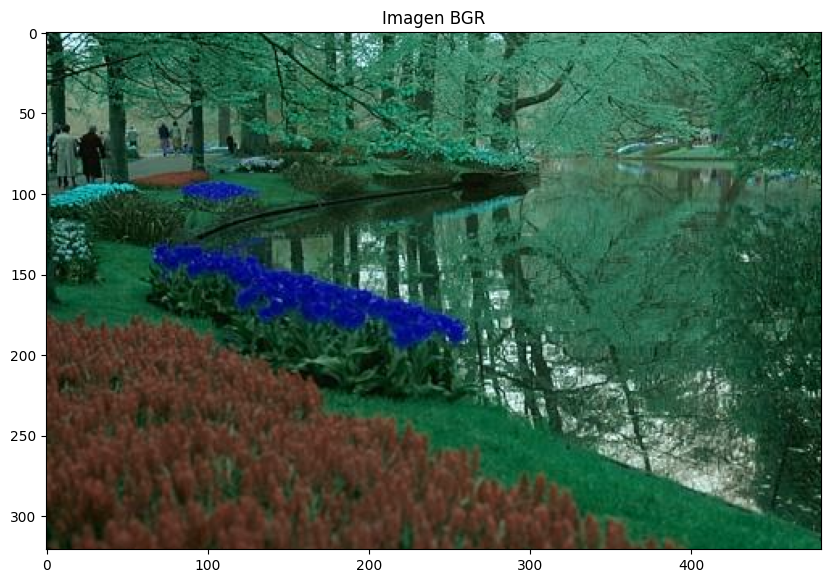

In [ ]:
imagen = cv2.imread('parque-con-flores.jpg')

info_imagen(imagen)

mostrar_imagen(imagen, "Imagen BGR", figsize=(10, 8))

La imagen posee mínimo 0 y máximo 255, esto se refiere al color, 0 es la ausencia de luz, y 255 es la maxima intensidad, cada pixel de la imagen posee valores para cada canal.

Las medidas son de 321x481 píxeles. Se puede observar que los colores de la imagen se muestra invertida, dado que la libreria OpenCV lee la imagen como BGR en lugar de RGB. Vamos a desarrollar más adelante como corregir el color.


## Canales BGR

La imagen se compone por tres canales de colores: Blue-Azul, Green-Verde, Red-Rojo.

Cada uno de estos canales representa una capa que posee la intensidad de ese color, van de 0 a 255, siendo cero baja intensidad o ausencia de luz y 255 alta intensidad del color.

En este caso estamos hablando del canal BGR que es como lo utliza OpenCV, el canal del Rojo y azul están invertidos, a pesar de que el verde se mantiene en la posición del medio también se puede percibir que esta alterado en su tonalidad.

Vamos a ver los canales uno por uno transformando la imagen a escala de grises y viendo la intensidad de cada uno.



### Canal azul

Estadísticas del canal Azul:
Valor mínimo: 0, Valor máximo: 236, Promedio: 51.03


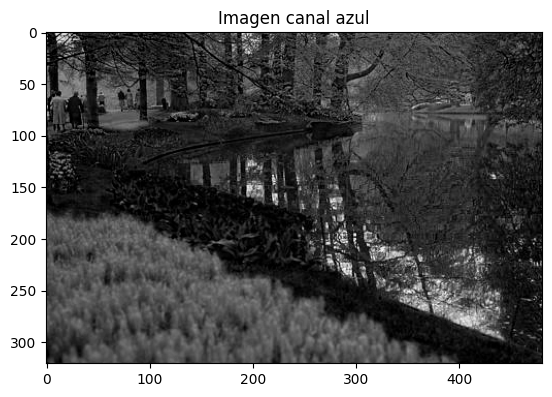

In [ ]:
canal_azul = obtener_canal(imagen, 'Azul', es_RGB=False)
mostrar_estadisticas_canal_imagen(canal_azul, 'Azul')
mostrar_imagen(canal_azul, "Imagen canal azul")


Dentro del rango del canal azul de la imagen, que va del 0 al 236, siendo el cero el que se aleja de la intensidad del color azul y 255 el máximo, que indica mayor presencia del azul. Esta imagen no posee un color azul con la total intensidad para llegar a 255, que en esta imagen se vería con una tonalidad cercana al blanco por ser escala de grises.

El promedio nos da 51.3 esta por debajo de la mitad de 255, esto me da una idea de que existe una menor presencia del color azul en esta imagen. Si ponemos atención a la imagen se podrá observar que la imagen es bastante opaca. Y si lo comparamos con la imagen original tiene relación ya que predomina el verde que pertenece a otro canal de los colores primarios.


### Canal verde

Estadísticas del canal Verde:
Valor mínimo: 0, Valor máximo: 255, Promedio: 85.02


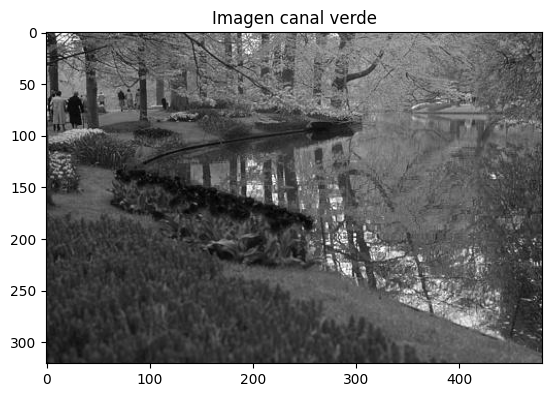

In [ ]:
canal_verde = obtener_canal(imagen, 'Verde', es_RGB=False)
mostrar_estadisticas_canal_imagen(canal_verde, 'Verde')
mostrar_imagen(canal_verde, "Imagen canal verde")

Analizando los valores obtenidos, se puede ver que en la imagen el canal verde va desde el cero, con menos intensidad al máximo, 255, siendo su promedio unos 85.02, esto implica que la imagen posee mayor intensidad verde que en canal azul, pero aún así no es completamente predominante el color, esto se puede deberse a la intensidad del verde, si bien si predomina en la foto, no lo hace completamente por los espacios que tiene, y así mismo no tiene la intensidad del color.

### Canal Rojo

Estadísticas del canal Rojo:
Valor mínimo: 0, Valor máximo: 255, Promedio: 65.13


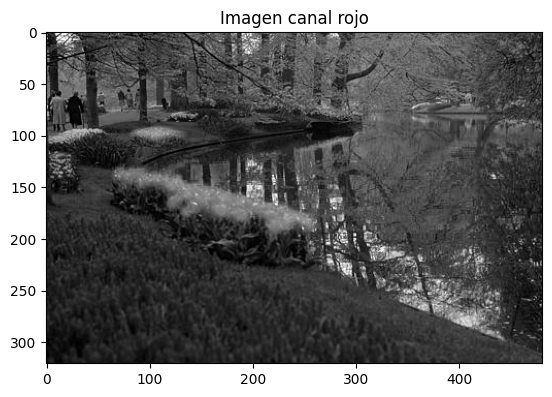

In [ ]:
canal_rojo = obtener_canal(imagen, 'Rojo', es_RGB=False)
mostrar_estadisticas_canal_imagen(canal_rojo, 'Rojo')
mostrar_imagen(canal_rojo, "Imagen canal rojo")

El canal rojo va desde el cero al 255, siendo su promedio 65.13, mayor que el canal azul y menor que el canal verde. Si bien en la foto original no predomina el color rojo, el hecho que el promedio se mayor que el azul puede deberse a que es utilizado para completar el color.

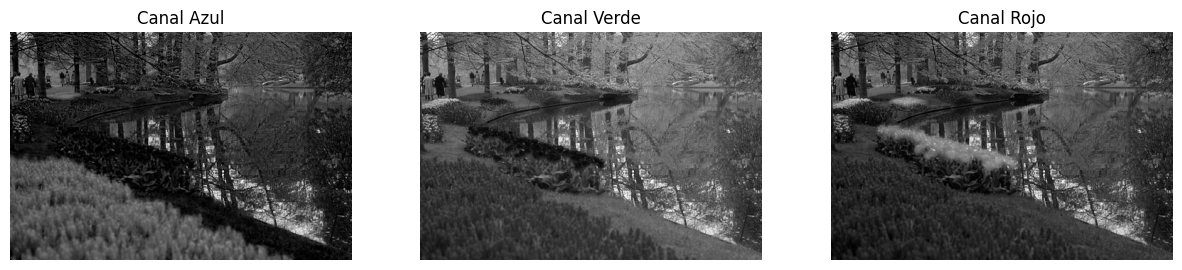

In [ ]:
# Crear la figura con los tres canales
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)  # 1 fila, 3 columnas, imagen 1
plt.imshow(canal_azul, cmap='gray')
plt.title("Canal Azul")
plt.axis("off")

plt.subplot(1, 3, 2)  # Imagen 2
plt.imshow(canal_verde, cmap='gray')
plt.title("Canal Verde")
plt.axis("off")

plt.subplot(1, 3, 3)  # Imagen 3
plt.imshow(canal_rojo, cmap='gray')
plt.title("Canal Rojo")
plt.axis("off")

plt.show()



Luego de analizar las fotos se puede apreciar que todas las fotos poseen una sección blanca en el mismo lugar, esto se debe a que cuando se obtiene el máximo de intensidad en los tres canales se generá el color blanco.

## Conversión BGR a RGB

Esto implica que los colores que deberían verse con las tonalidades de rojo sean azules y viceversa.

Ahora voy a invertir los canales para que se vea la imagen original


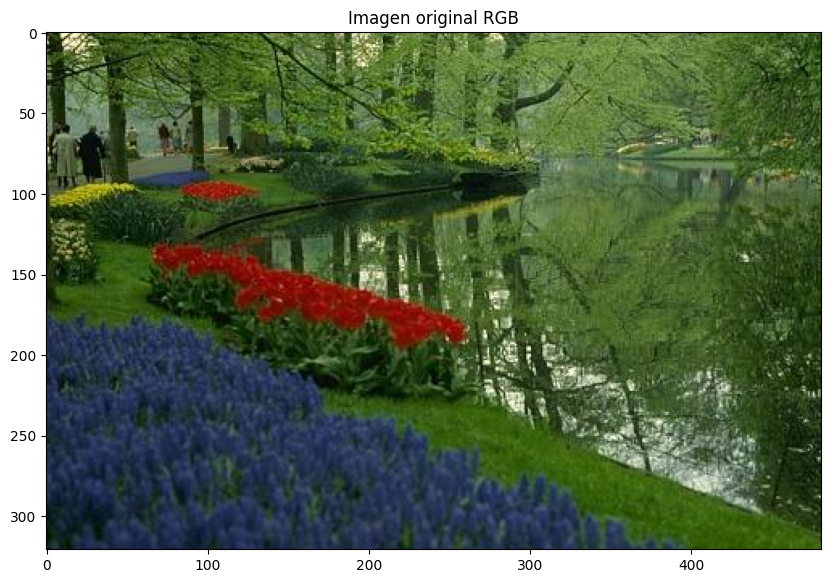

In [ ]:
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
mostrar_imagen(imagen_rgb, "Imagen original RGB", figsize=(10, 10))




La imagen no solo se ve distinta por las tonalidades de azul y rojo, sino que también el verde tenia otra tonalidad, esto es porque dentro de la imagen no todo lo verde es puramente color verde, sino una combinación entre los tres canales.

## Conclusión

Luego de realizar el ejercicio de color pude ver la diferencia entre trabajar con la gama de RGB y BGR, con las distintas librerías, en este caso para leer la imagen se utilizo OpenCV, que transforma la imagen y los muestra en el formato BGR. OpenCV tiene la función de mostrar la imagen utilizando la función:

cv2_imshow(img)

Por motivos de compatibilidad lo reemplace con el uso de matplotlib, y al mostrar la imagen se puede ver que utiliza los canales RGB, dando como resultado una imagen distorsionada. Esto debe ser tomado en cuenta al momento de analizar una imagen.

En el caso de la intensidad de color vi que dos de los canales llegaban a 255, y uno a 236, pero esos correspondían a la formación del color cercano al blanco, y no exclusivamente al color.
